# Exploration and Data Cleaning
## Datasets
#### Digital Footprints
1. [df_final_web_data_pt_1](https://github.com/data-bootcamp-v4/lessons/blob/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt)
2. [df_final_web_data_pt_2](https://github.com/data-bootcamp-v4/lessons/blob/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt)
#### Experiment Roster
3. [df_final_experiment_clients](https://github.com/data-bootcamp-v4/lessons/blob/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [5]:
# Datasets:

df_final_web_data_pt_1 = pd.read_csv('../data/raw/df_final_web_data_pt_1.txt', sep=',')
df_final_web_data_pt_2 = pd.read_csv('../data/raw/df_final_web_data_pt_2.txt', sep=',')

df_final_experiment_clients = pd.read_csv('../data/raw/df_final_experiment_clients.txt', sep=',')

In [6]:
# Let's start with the exploration and cleaning of 'df_final_web_data_pt_1'
df_final_web_data_pt_1.shape

(343141, 5)

In [7]:
# Checking for duplicates in 'df_final_web_data_pt_1'
df_final_web_data_pt_1.duplicated().sum()

2095

In [8]:
# Remove duplicates
df_final_web_data_pt_1 = df_final_web_data_pt_1.drop_duplicates()

# Verify if duplicates are removed
df_final_web_data_pt_1.shape

(341046, 5)

In [9]:
# Filtering out columns where more than 80% of the values are missing
df_final_web_data_pt_1 = df_final_web_data_pt_1[df_final_web_data_pt_1.columns[df_final_web_data_pt_1.isnull().mean() < 0.8]]
df_final_web_data_pt_1.shape

(341046, 5)

In [10]:
# Checking for null values in 'df_final_web_data_pt_2'
df_final_web_data_pt_1.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [11]:
df_final_web_data_pt_1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [12]:
# Now, let's continue with the exploration and cleaning of 'df_final_web_data_pt_2'
df_final_web_data_pt_2.shape

(412264, 5)

In [13]:
# Checking for duplicates in 'df_final_web_data_pt_2'
df_final_web_data_pt_2.duplicated().sum()

8669

In [14]:
# Remove duplicates
df_final_web_data_pt_2 = df_final_web_data_pt_2.drop_duplicates()

# Verify if duplicates are removed
df_final_web_data_pt_2.shape

(403595, 5)

In [15]:
# Filtering out columns where more than 80% of the values are missing
df_final_web_data_pt_2 = df_final_web_data_pt_2[df_final_web_data_pt_2.columns[df_final_web_data_pt_2.isnull().mean() < 0.8]]
df_final_web_data_pt_2.shape

(403595, 5)

In [16]:
# Checking for null values in 'df_final_web_data_pt_2'
df_final_web_data_pt_2.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [17]:
df_final_web_data_pt_2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [18]:
# Merge Digital Footprints datasets: 'df_final_web_data_pt_1' and 'df_final_web_data_pt_2'
df_final_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], ignore_index=True)
df_final_web_data.shape

(744641, 5)

In [19]:
# Checking for null values in df_final_web_data.
df_final_web_data.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [20]:
df_final_web_data.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [21]:
df_final_web_data.shape

(744641, 5)

In [22]:
# Now we will merge the dataset 'df_final_web_data' with 'df_final_experiment_clients' in order
# to have in just one dataset all the data related to the AB test

# First, let's explore and clean the 'df_final_experiment_clients'

df_final_experiment_clients.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [23]:
df_final_experiment_clients.shape

(70609, 2)

In [24]:
# Checking for duplicates in 'df_final_experiment_clients'
df_final_experiment_clients.duplicated().sum()

0

In [25]:
# Filtering out columns where more than 80% of the values are missing
df_final_experiment_clients = df_final_experiment_clients[df_final_experiment_clients.columns[df_final_experiment_clients.isnull().mean() < 0.8]]
df_final_experiment_clients.shape

(70609, 2)

In [26]:
# Checking for null values in 'df_final_experiment_clients'
df_final_experiment_clients.isnull().sum()

client_id        0
Variation    20109
dtype: int64

In [27]:
# Drop rows with null values in 'df_final_experiment_clients'
df_final_experiment_clients = df_final_experiment_clients.dropna()

# Verify if nulls are removed
df_final_experiment_clients.isnull().sum()

client_id    0
Variation    0
dtype: int64

In [28]:
df_final_experiment_clients.shape

(50500, 2)

In [29]:
# We will analyze only the observations that are part of the AB test, specifically those with a defined 'Variation'.
# To achieve this, we will perform an inner join between 'df_final_experiment_clients' and 'df_final_web_data'

# Perform an inner join on the two DataFrames using the 'client_id' column
df_final_experiment_web_data = pd.merge(df_final_web_data, df_final_experiment_clients, on='client_id', how='inner')

df_final_experiment_web_data.head()

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test


In [30]:
df_final_experiment_web_data.shape

(317235, 6)

## Merge the 'df_final_experiment_web_data' with the client demographic data.

In [32]:
df_final_demo = pd.read_csv("../data/raw/df_final_demo.txt", delimiter=",")
df_final_demo.shape

(70609, 9)

In [33]:
df_final_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [34]:
# Checking for duplicates in 'df_final_experiment_clients'
df_final_demo.duplicated().sum()

0

In [35]:
df_final_demo.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [36]:
# Filtering out columns where more than 80% of the values are missing
df_final_demo = df_final_demo[df_final_demo.columns[df_final_demo.isnull().mean() < 0.8]]
df_final_demo.shape

(70609, 9)

In [37]:
df_final_demo.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [38]:
# Perform an inner join on the two DataFrames using the 'client_id' column
# 'df_final_experiment_web_data' and 'df_final_demo'
df_final = pd.merge(df_final_experiment_web_data, df_final_demo, on='client_id', how='inner')

df_final.head()

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0


In [39]:
df_final.shape

(317235, 14)

In [40]:
# export the final dataframe to a CSV file
df_final.to_csv('df_final', index=False)

In [41]:
# Now we will explore the final dataframe 'df_final'

# Analysing the unique values
df_final.nunique()

client_id            50500
visitor_id           56011
visit_id             69205
process_step             5
date_time           283344
Variation                2
clnt_tenure_yr          53
clnt_tenure_mnth       469
clnt_age               158
gendr                    4
num_accts                7
bal                  50312
calls_6_mnth             7
logons_6_mnth            7
dtype: int64

In [42]:
df_final['process_step'].unique()

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)

process_step,confirm,start,step_1,step_2,step_3
Variation,,,,,
Control,17336,45380,29544,25773,22503
Test,25600,55773,38666,30899,25761


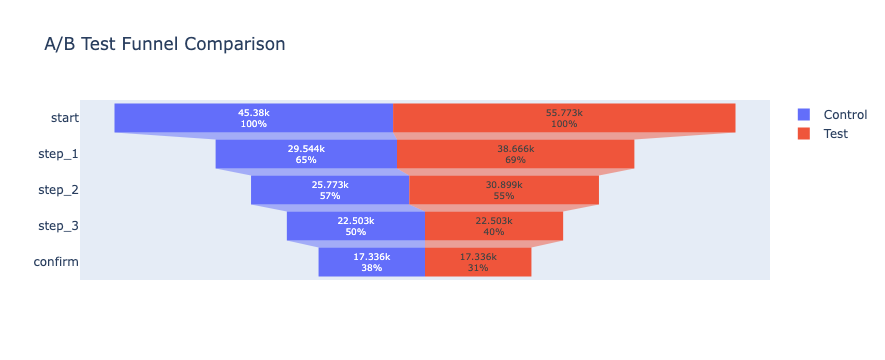

In [100]:
import plotly.graph_objects as go

# Data
stages = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
control = [45380, 29544, 25773, 22503, 17336] # Funnel A
test = [55773, 38666, 30899, 22503, 17336] # Funnel B


fig = go.Figure()

# Funnel A
fig.add_trace(go.Funnel(
    name='Control',
    y=stages,
    x=control,
    textinfo="value+percent initial"))

# Funnel B
fig.add_trace(go.Funnel(
    name='Test',
    y=stages,
    x=test,
    textinfo="value+percent initial"))

fig.update_layout(title="A/B Test Funnel Comparison")

fig.show()

In [102]:
def calculate_dropoff_percentages(funnel):
    dropoffs = []
    for i in range(1, len(funnel)):
        dropoff = (funnel[i-1] - funnel[i]) / funnel[i-1] * 100
        dropoffs.append(dropoff)
    return dropoffs

# Calculate drop-off percentages
control_dropoffs = calculate_dropoff_percentages(control)
test_dropoffs = calculate_dropoff_percentages(test)

# Display the drop-off percentages
control_dropoffs, test_dropoffs

([34.896430145438515,
  12.764012997562958,
  12.687696426492842,
  22.961382926720884],
 [30.672547648503755,
  20.087415300263796,
  27.172400401307485,
  22.961382926720884])

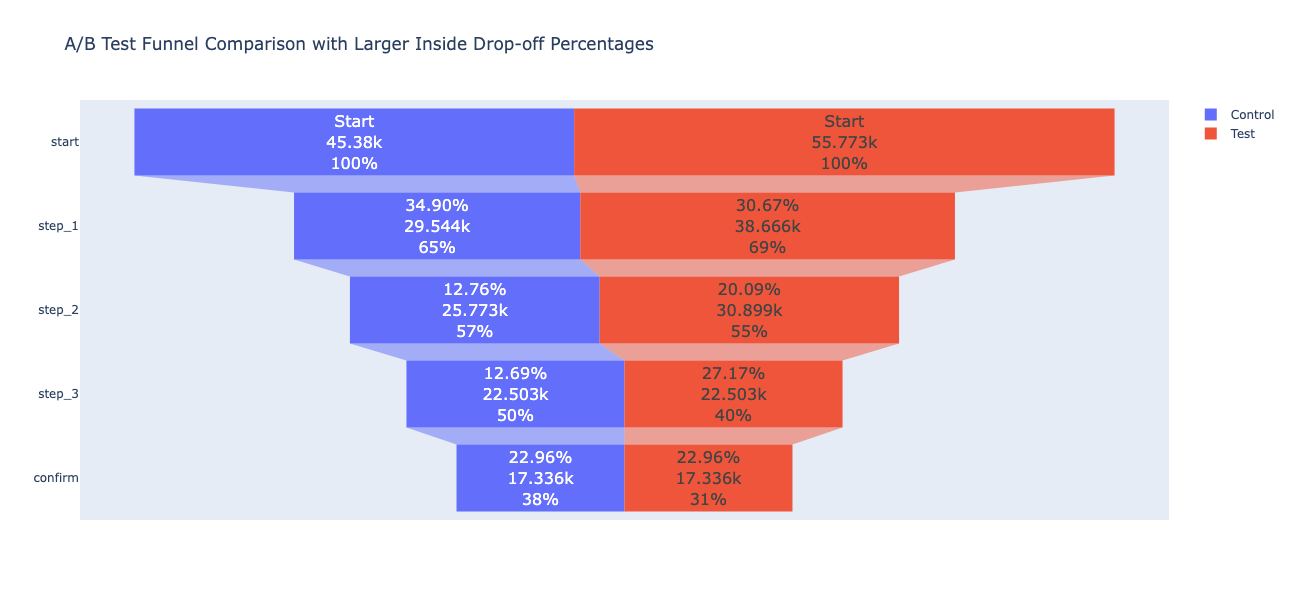

In [116]:
import plotly.graph_objects as go

# Function to calculate drop-off percentages
def calculate_dropoff_percentages(funnel):
    dropoffs = []
    for i in range(1, len(funnel)):
        dropoff = (funnel[i-1] - funnel[i]) / funnel[i-1] * 100
        dropoffs.append(f"{dropoff:.2f}%")
    dropoffs.insert(0, "Start")  # No drop-off for the first step
    return dropoffs

# Data
stages = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
control = [45380, 29544, 25773, 22503, 17336]  # Funnel A
test = [55773, 38666, 30899, 22503, 17336]    # Funnel B

# Calculate drop-off percentages
control_dropoffs = calculate_dropoff_percentages(control)
test_dropoffs = calculate_dropoff_percentages(test)

# Create the funnel chart with larger figure size
fig = go.Figure()

# Funnel A with larger drop-off percentages inside the funnel
fig.add_trace(go.Funnel(
    name='Control',
    y=stages,
    x=control,
    text=control_dropoffs,
    textinfo="text+value+percent initial",
    textposition="inside",
    textfont=dict(size=18)  # Increase font size specifically for inside funnel
))

# Funnel B with larger drop-off percentages inside the funnel
fig.add_trace(go.Funnel(
    name='Test',
    y=stages,
    x=test,
    text=test_dropoffs,
    textinfo="text+value+percent initial",
    textposition="inside",
    textfont=dict(size=18)  # Increase font size specifically for inside funnel
))

# Increase the size of the figure to allow more space for text
fig.update_layout(
    title="A/B Test Funnel Comparison with Larger Inside Drop-off Percentages",
    height=600,  # Increase height to make more room
    width=800   # Increase width if necessary
)

fig.show()
